# Capestone Project submission: 
### High Level Machine Learning Classification Project Life Cycle
## Student: Ginju Soumya

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
import warnings

In [2]:
url = 'https://community.ibm.com/community/user/businessanalytics/home?cm_mc_uid=14714377267115403444551&cm_mc_sid_50200000=12578191540344455127&cm_mc_sid_52640000=36692891540344455130'

Read and Identify the target variable


In [3]:
df = pd.read_csv('Telco-Customer-Churn.csv',index_col='customerID')

In [4]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Inspect the data

In [5]:
df.describe(include=object)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [6]:
df.describe(include=object).T

,count,unique,top,freq
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095
TechSupport,7043,3,No,3473


In [7]:
df.shape

(7043, 20)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), object(17)
memory usage: 1.1+ MB


In [9]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Data Manipulation


In [10]:
df.isna().any()  # cheching for null values

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

No null values found

In [11]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [12]:
df[df['TotalCharges'].isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,


In [13]:
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"], errors='coerce')

In [14]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Impute the missing values

In [15]:
df["TotalCharges"] = df['TotalCharges'].fillna((df['TotalCharges'].mean()))

In [16]:
len(df[df['TotalCharges'].isna()])

0

Data Analysis:

In [17]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [18]:
df_categorical = df[['gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']]

In [19]:
#select data types that include only objects
column_categorical = df_categorical.columns

In [20]:
df_categorical.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
customerID,,,,,,,,,,,,,,,,
7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [21]:
#select data types that include floating values
df_numerical = df[['SeniorCitizen','tenure','MonthlyCharges', 'TotalCharges']]

In [22]:
df_numerical.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
customerID,,,,
7590-VHVEG,0,1,29.85,29.85
5575-GNVDE,0,34,56.95,1889.50
3668-QPYBK,0,2,53.85,108.15
7795-CFOCW,0,45,42.30,1840.75
9237-HQITU,0,2,70.70,151.65


Univariate Analysis

In [23]:
def display_plot(df, col_to_exclude, object_mode = True):
    """      
    This function plots the count or distribution of each column in the dataframe based on
    @Args
      df: pandas dataframe
      col_to_exclude: specific column to exclude from the plot, used for excluded key
      object_mode: whether to plot on object data types or not (default: True)
    
    Return       
      No object returned but visualized plot will return based on specified inputs
    """
    n = 0
    this = []
    
    if object_mode:
        
        nrows = 4
        ncols = 4
        width = 20
        height = 20
        
    else:
        nrows = 2
        ncols = 2
        width = 14
        height = 10
    
    for column in df.columns:
        if object_mode:
            if (df[column].dtypes == 'O') & (column != col_to_exclude):
                this.append(column)
            
        else:
            if (df[column].dtypes != 'O'):
                this.append(column)
                    
    fig, ax = plt.subplots(nrows, ncols, sharex=False, sharey=False, figsize=(width, height))
    for row in range(nrows):
        for col in range(ncols):
            if object_mode:
                g = sns.countplot(df[this[n]], ax=ax[row][col])
            else:
                g = sns.distplot(df[this[n]], ax = ax[row][col])
                                                         
                        
            ax[row,col].set_title("Column name: {}".format(this[n]))
            ax[row, col].set_xlabel("")
            ax[row, col].set_ylabel("")
            n += 1
    plt.show();
    return None

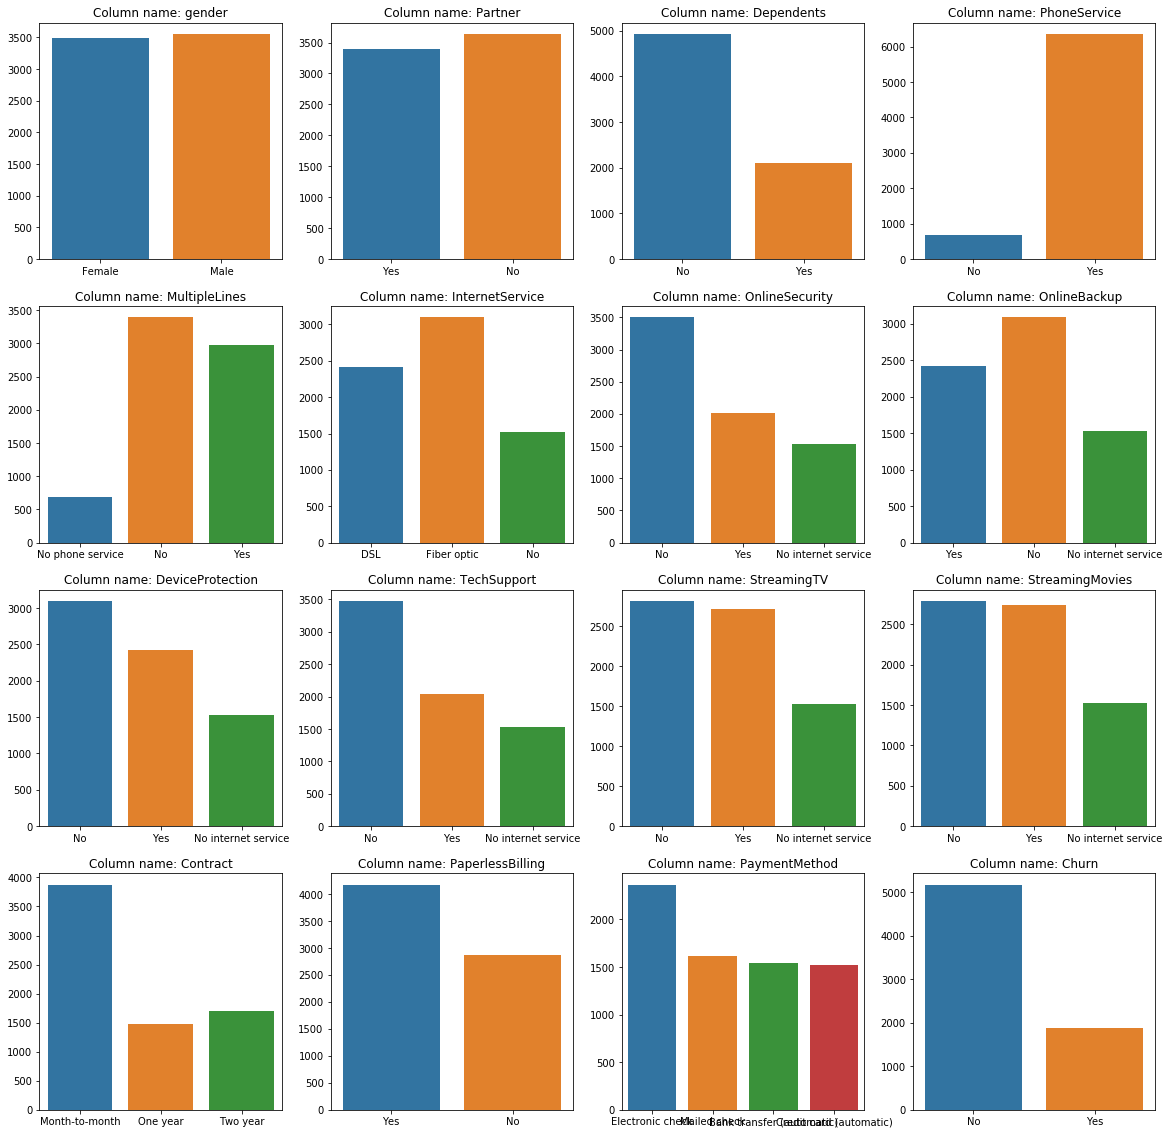

In [24]:
display_plot(df, 'customerid', object_mode = True)

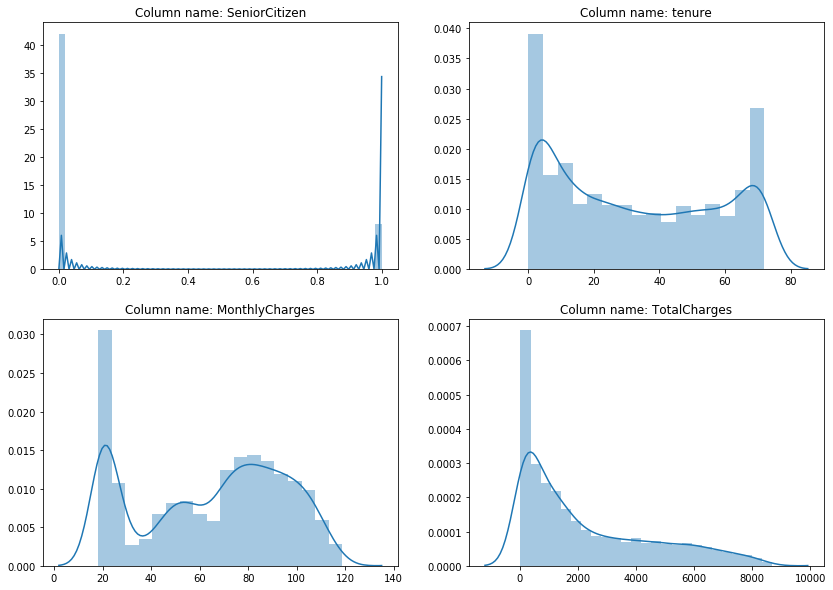

In [25]:
display_plot(df, 'customerid', object_mode = False )

feature Engineering


In [26]:
pd.crosstab(index = df["PhoneService"], columns = df["MultipleLines"])


MultipleLines,No,No phone service,Yes
PhoneService,,,
No,0,682,0
Yes,3390,0,2971


In [27]:
pd.crosstab(index = df["InternetService"], columns = df["StreamingTV"])

StreamingTV,No,No internet service,Yes
InternetService,,,
DSL,1464,0,957
Fiber optic,1346,0,1750
No,0,1526,0


In [28]:
df["PhoneService"]= df["PhoneService"].str.replace("No phone service", "No",case = False)
df["MultipleLines"]= df["MultipleLines"].str.replace("No phone service", "No",case = False)
df["OnlineSecurity"]= df["OnlineSecurity"].str.replace("No internet service", "No",case = False)
df["OnlineBackup"]= df["OnlineBackup"].str.replace("No internet service", "No",case = False)
df["DeviceProtection"]= df["DeviceProtection"].str.replace("No internet service", "No",case = False)
df["TechSupport"]= df["TechSupport"].str.replace("No internet service", "No",case = False)
df["StreamingTV"]= df["StreamingTV"].str.replace("No internet service", "No",case = False)
df["StreamingMovies"]= df["StreamingMovies"].str.replace("No internet service", "No",case = False)

In [29]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


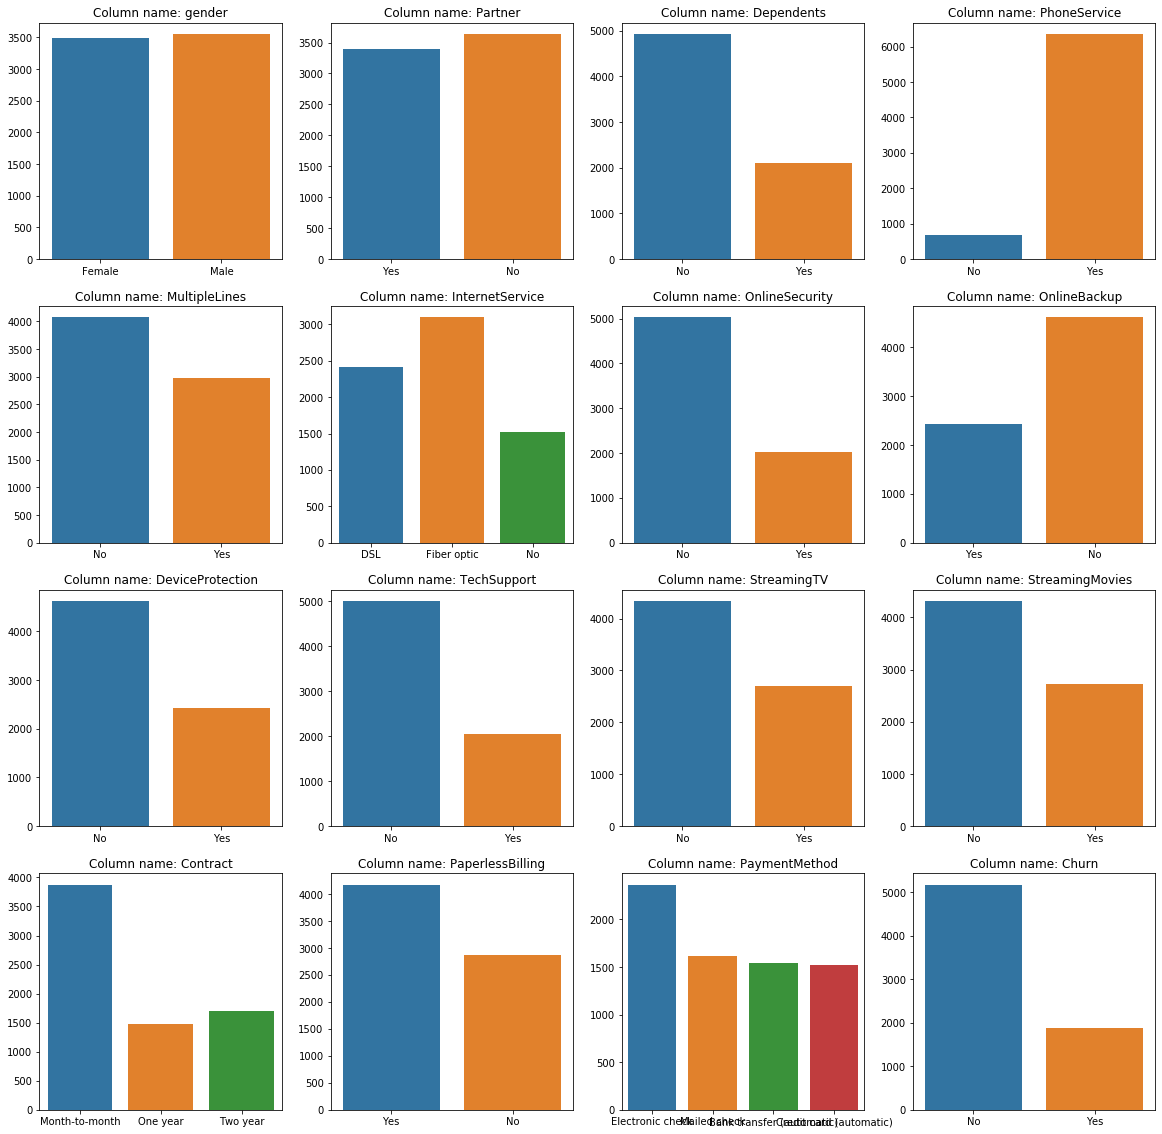

In [30]:
#df = convert_no_service(df)
# Let's see the data after transformation.
display_plot(df, 'customerid', object_mode = True)

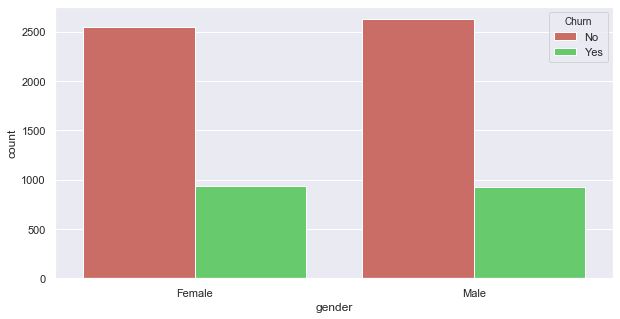

In [31]:
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(x="gender", hue="Churn", data=df)

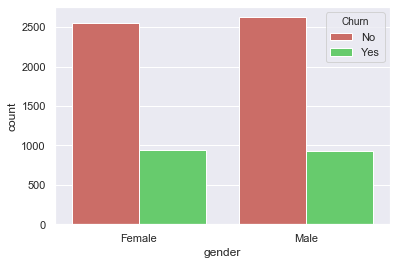

In [32]:
# Now Let's Start Comparing.
# Gender Vs Churn
ax = sns.countplot(x="gender", hue="Churn", data=df)

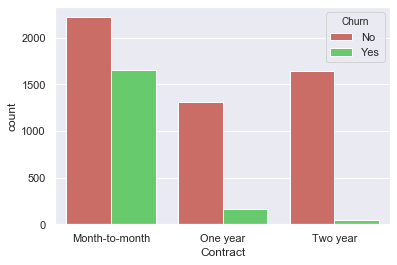

In [33]:
#Contract Vs Churn
ax = sns.countplot(x="Contract", hue="Churn", data=df)

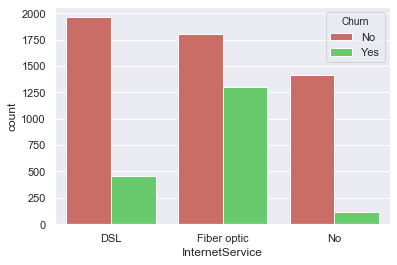

In [34]:
# Internet Service Vs Churn
ax = sns.countplot(x="InternetService", hue="Churn", data=df)

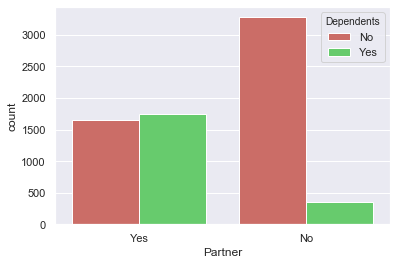

In [35]:
# Partner Vs Dependents
ax = sns.countplot(x="Partner", hue="Dependents", data=df)

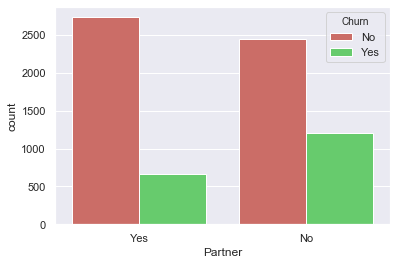

In [36]:
# Partner Vs Churn
ax = sns.countplot(x="Partner", hue="Churn", data=df)

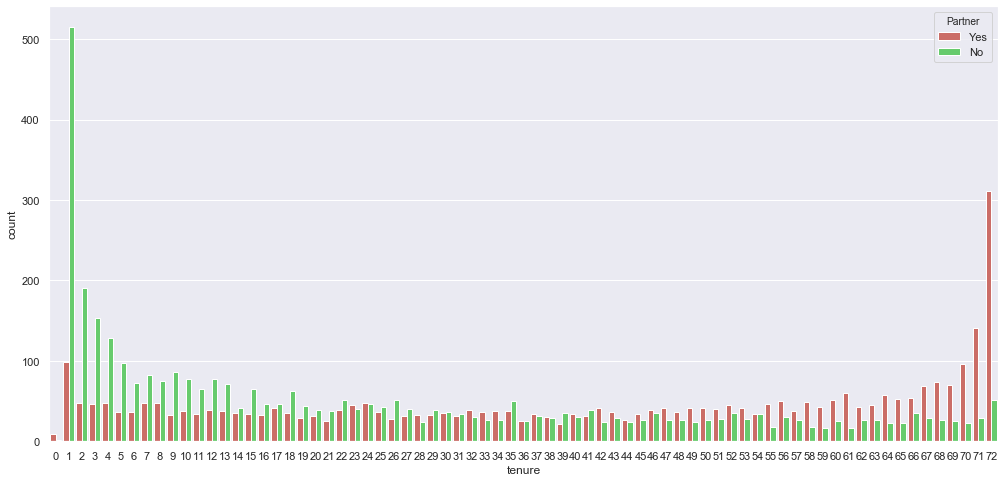

In [37]:
plt.figure(figsize=(17,8))
sns.countplot(x=df['tenure'],hue=df.Partner);

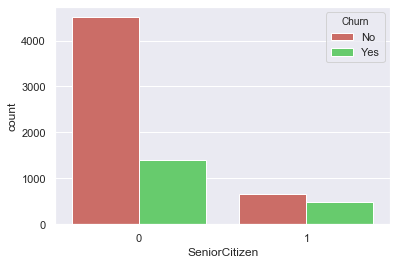

In [38]:
# Senior Citizen Vs Churn
ax = sns.countplot(x="SeniorCitizen", hue="Churn", data=df)

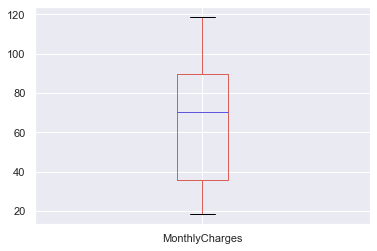

In [39]:
df.boxplot('MonthlyCharges'); #Check for Outliers in Monthly Charges And Total Charges Using Box Plots

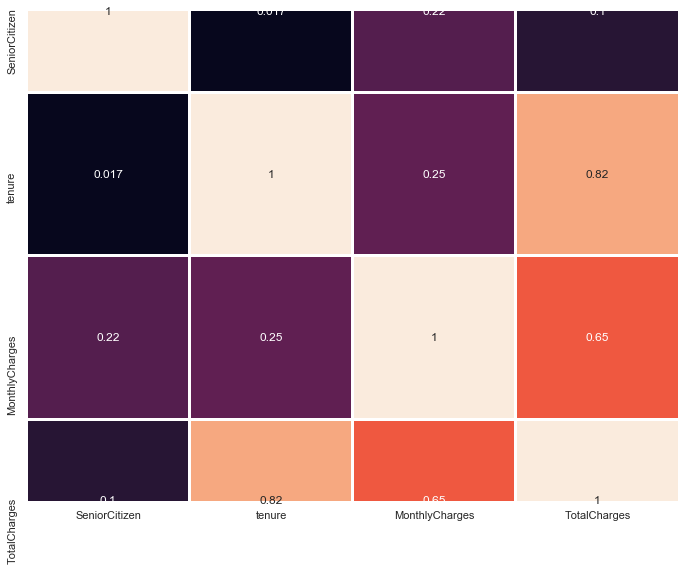

In [40]:
## correlation matrix
# Let's Check the Correaltion Matrix in Seabo
corr = df.corr()
plt.figure(figsize=(16,9))
ax1 = sns.heatmap(corr, cbar=0, linewidths=2,vmax=1, vmin=0, square=True,annot=True)
plt.show()

Bucketing

In [41]:
#Tenure to categorical column
def tenure_lab(telcom):
    if telcom["tenure"] <= 12 :
        return "Tenure_0-12"
    elif (telcom["tenure"] > 12) & (telcom["tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (telcom["tenure"] > 24) & (telcom["tenure"] <= 48) :
        return "Tenure_24-48"
    elif (telcom["tenure"] > 48) & (telcom["tenure"] <= 60) :
        return "Tenure_48-60"
    elif telcom["tenure"] > 60 :
        return "Tenure_gt_60"

df["tenure_group"] = df.apply(lambda x:tenure_lab(x),axis = 1)

Data preprocessing

In [42]:
#replace values
df["SeniorCitizen"] = df["SeniorCitizen"].replace({1:"Yes",0:"No"})

In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
#customer id col
Id_col = ['customerID']

#Target columns
target_col = ["Churn"]


#categorical columns
cat_cols = df.nunique()[df.nunique() < 6].keys().tolist()
cat_cols = [x for x in cat_cols if x not in target_col]

#numerical columns
num_cols = [x for x in df.columns if x not in cat_cols + target_col + Id_col]

#Binary columns with 2 values
bin_cols = df.nunique()[df.nunique() == 2].keys().tolist()

#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    df[i] = le.fit_transform(df[i])
    
#Duplicating columns for multi value columns
df = pd.get_dummies(data = df,columns = multi_cols )

In [45]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,1,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
5575-GNVDE,1,0,0,0,34,1,0,1,0,1,...,0,0,0,0,1,0,0,1,0,0
3668-QPYBK,1,0,0,0,2,1,0,1,1,0,...,0,0,0,0,1,1,0,0,0,0
7795-CFOCW,1,0,0,0,45,0,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
9237-HQITU,0,0,0,0,2,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [46]:
df2=df.copy()
df3=df.copy()

In [47]:
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,1,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
5575-GNVDE,1,0,0,0,34,1,0,1,0,1,...,0,0,0,0,1,0,0,1,0,0
3668-QPYBK,1,0,0,0,2,1,0,1,1,0,...,0,0,0,0,1,1,0,0,0,0
7795-CFOCW,1,0,0,0,45,0,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
9237-HQITU,0,0,0,0,2,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [48]:
#df3["Churn"]= le.fit_transform(df3["Churn"])
#df3["tenure_group"]= le.fit_transform(df3["tenure_group"])

Normalizing features

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler()
X_proc = scaler.fit_transform(df3.drop("Churn", axis=1))
X_nproc = df3.drop("Churn", axis=1)

In [51]:
X_proc[:2]

array([[-1.00955867, -0.43991649,  1.03453023, -0.65401193, -1.27744458,
        -3.05401039, -0.85417615, -0.63393298,  1.3782406 , -0.72396752,
        -0.63943864, -0.79013171, -0.79607014,  0.8297975 , -1.16032292,
        -0.99497138,  1.38171215, -0.88565976, -0.52592737,  0.90418382,
        -0.51424938, -0.56297505, -0.5298852 , -0.52504733,  1.40641839,
        -0.54480692,  1.49059264, -0.41246567, -0.54086111, -0.36599984,
        -0.49964501],
       [ 0.99053183, -0.43991649, -0.96662231, -0.65401193,  0.06632742,
         0.32743831, -0.85417615,  1.57745383, -0.72556272,  1.38127743,
        -0.63943864, -0.79013171, -0.79607014, -1.20511329, -0.25962894,
        -0.17387565,  1.38171215, -0.88565976, -0.52592737, -1.1059698 ,
         1.94458183, -0.56297505, -0.5298852 , -0.52504733, -0.71102597,
         1.83551265, -0.6708741 , -0.41246567,  1.8489035 , -0.36599984,
        -0.49964501]])

In [52]:
y= df3["Churn"]

spliting train/val/test data

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_pr_train, X_pr_test, y_train, y_test = train_test_split(X_proc, y, test_size=0.30, random_state=0)
X_npr_train, X_npr_test, y_train, y_test = train_test_split(X_nproc, y, test_size=0.30, random_state=0)

Model Building

In [55]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [56]:
from sklearn.dummy import DummyClassifier

# Feature Selection and Encoding
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# Machine learning
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [57]:
# validation
from sklearn.model_selection import cross_val_score

In [58]:
# Grid and Random Search
import scipy.stats as st

from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [59]:
# Metrics
from sklearn.metrics import accuracy_score, roc_auc_score

In [60]:
from sklearn.model_selection import KFold

In [61]:
from sklearn.dummy import DummyClassifier
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

In [62]:
#utilities
import time
import io, os, sys, types, time, datetime, math, random

In [63]:
# calculate the fpr and tpr for all thresholds of the classification

In [64]:
model1 = LogisticRegression()
model2 = LogisticRegression()
model1.fit(X_pr_train, y_train)
model2.fit(X_npr_train, y_train)

#pred1 = model1.predict(X_test)
probs1 = model1.predict_proba(X_pr_test)
probs2 = model2.predict_proba(X_npr_test)
preds1 = probs1[:,1]
preds2 = probs2[:,1]

C:\Users\Redhawk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Redhawk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [65]:
fpr1, tpr1, threshold1 = metrics.roc_curve(y_test, preds1)
fpr2, tpr2, threshold2 = metrics.roc_curve(y_test, preds2)
roc_auc1 = metrics.auc(fpr1, tpr1)
roc_auc2 = metrics.auc(fpr2, tpr2)

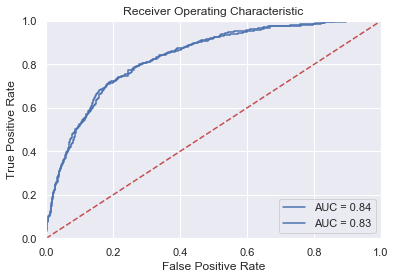

In [66]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc1)
plt.plot(fpr2, tpr2, 'b', label = 'AUC = %0.2f' % roc_auc2)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Interpretation: 1% difference of AUC Score is observed between raw data and the normalised data 

In [68]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'
# Spot-Check Algorithms
models = []
models.append(('Logistic', LogisticRegression()))
models.append(('SGD', SGDClassifier()))
models.append(('SVC', SVC()))
models.append(('kNN',KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('GB',XGBClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NaivB', GaussianNB()))

models

[('Logistic',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='warn', n_jobs=None, penalty='l2',
                     random_state=None, solver='warn', tol=0.0001, verbose=0,
                     warm_start=False)),
 ('SGD', SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
                l1_ratio=0.15, learning_rate='optimal', loss='hinge',
                max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
                power_t=0.5, random_state=None, shuffle=True, tol=0.001,
                validation_fraction=0.1, verbose=0, warm_start=False)),
 ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
      kernel='rbf', max_iter=-1, probability=False, random_state=N

In [68]:
# evaluation
results = []
names = []
model_comp=pd.DataFrame(columns=['Model','Test Accuracy','Std.Dev'])

for name, model in models:
    
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_pr_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    model_comp=model_comp.append([{'Model':name, 'Test Accuracy':cv_results.mean(), 'Std.Dev':cv_results.std()}],ignore_index=True)
    
model_comp

C:\Users\Redhawk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Redhawk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Redhawk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Redhawk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Redhawk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

,Model,Test Accuracy,Std.Dev
0,Logistic,0.802434,0.016181
1,SGD,0.781339,0.015092
2,SVC,0.799391,0.020374
3,kNN,0.768966,0.023974
4,CART,0.725963,0.018423
5,GB,0.778499,0.014106
6,RF,0.778702,0.014125
7,NeivB,0.748276,0.017993


Baseline model with DummyClassifier

In [69]:
clf = DummyClassifier(strategy='most_frequent',random_state=0)
clf.fit(X_pr_train, y_train)

DummyClassifier(constant=None, random_state=0, strategy='most_frequent')

In [70]:
accuracy = clf.score(X_pr_test, y_test)
accuracy

0.7382867960246096

In [71]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score,f1_score

In [72]:
def fit_ml_algo(algo, X_train, y_train, X_test, y_test, cv):
    
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc= round(model.score(X_train, y_train) * 100, 2)
    #acc = algo.score(X_train, y_train)
    
    # Cross Validation 
    train_pred = cross_val_predict(algo, X_train,
                                   y_train, cv=cv,
                                   n_jobs = -1)
    
    test_pred = cross_val_predict(algo, X_test,
                                   y_test, cv=cv,
                                   n_jobs = -1)    
    
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    probs = algo.predict_proba(X_test)
    confus_matr = metrics.confusion_matrix(y_train, train_pred)
    precision = precision_score(y_train, train_pred)
    recall = recall_score(y_train, train_pred)
    F1 = f1_score(y_train, train_pred)
    auc = roc_auc_score(y_train, train_pred)
    
    return train_pred, test_pred, acc, acc_cv, probs #confus_matr, precision, recall, F1, auc

In [73]:
preds = clf.predict(X_pr_test)
alg = DummyClassifier(strategy='most_frequent', random_state=0)
print(alg)

# dummyistic Regression
start_time = time.time() #test_pred_dummy, 
train_pred_dummy, test_pred_dummy, acc_dummy, acc_cv_dummy, probs_dummy = fit_ml_algo(alg, X_pr_train, y_train, X_pr_test, y_test, cv=10)
dummy_time = (time.time() - start_time)

print("Accuracy: %s" % acc_dummy)
print("Accuracy CV 10-Fold: %s" % acc_cv_dummy)
print("Running Time: %s" % datetime.timedelta(seconds=dummy_time))

print (metrics.classification_report(y_train, train_pred_dummy))

print (metrics.classification_report(y_test, test_pred_dummy))

DummyClassifier(constant=None, random_state=0, strategy='most_frequent')
Accuracy: 73.31
Accuracy CV 10-Fold: 73.31
Running Time: 0:00:02.856532
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      3614
           1       0.00      0.00      0.00      1316

    accuracy                           0.73      4930
   macro avg       0.37      0.50      0.42      4930
weighted avg       0.54      0.73      0.62      4930

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1560
           1       0.00      0.00      0.00       553

    accuracy                           0.74      2113
   macro avg       0.37      0.50      0.42      2113
weighted avg       0.55      0.74      0.63      2113



C:\Users\Redhawk\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Redhawk\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Redhawk\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [74]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


C:\Users\Redhawk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 80.91
Accuracy CV 10-Fold: 80.41
Running Time: 0:00:00.402913
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      3614
           1       0.66      0.54      0.60      1316

    accuracy                           0.80      4930
   macro avg       0.75      0.72      0.73      4930
weighted avg       0.80      0.80      0.80      4930

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1560
           1       0.65      0.50      0.57       553

    accuracy                           0.80      2113
   macro avg       0.74      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113



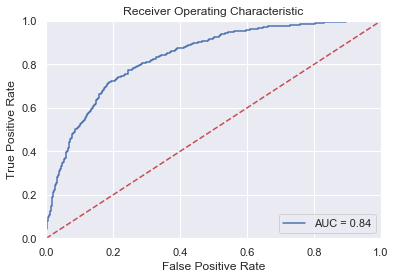

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=200,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=0,
                                                solver='saga', tol=0.01,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000262DABEF288>,
                                        'penalty': ['l2', 'l1']},
                   pre_dispatch='2*n_jobs', random_state=0, refit=True,
             

C:\Users\Redhawk\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Accuracy: 80.85
Accuracy CV 10-Fold: 80.41
Running Time: 0:00:03.885612
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      3614
           1       0.66      0.54      0.59      1316

    accuracy                           0.80      4930
   macro avg       0.75      0.72      0.73      4930
weighted avg       0.79      0.80      0.80      4930

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1560
           1       0.65      0.50      0.56       553

    accuracy                           0.80      2113
   macro avg       0.74      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113



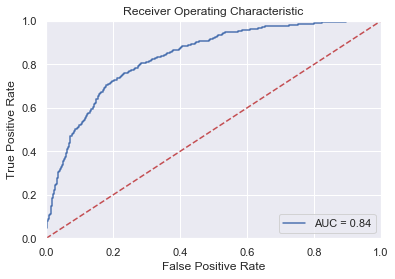

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
Accuracy: 83.85
Accuracy CV 10-Fold: 76.96
Running Time: 0:00:01.520081
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      3614
           1       0.57      0.53      0.55      1316

    accuracy                           0.77      4930
   macro avg       0.70      0.69      0.70      4930
weighted avg       0.76      0.77      0.77      4930

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1560
           1       0.56      0.54      0.55       553

    accuracy                           0.77      2113
   macro avg       0.70      0.69      0.69      2113
weighted avg       0.76      0.77      0.76      2113



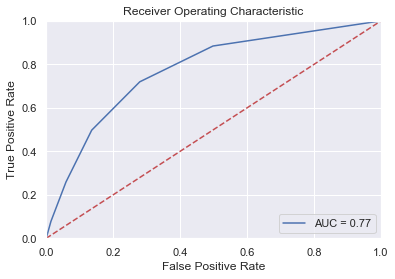

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
Accuracy: 99.72
Accuracy CV 10-Fold: 72.45
Running Time: 0:00:00.224268
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      3614
           1       0.48      0.48      0.48      1316

    accuracy                           0.72      4930
   macro avg       0.65      0.65      0.65      4930
weighted avg       0.72      0.72      0.72      4930

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1560
           1       0.48      0.50      0.49       553

    accuracy                    

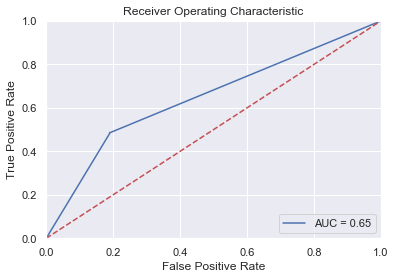

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=False, verbosity=None)
Accuracy: 95.03
Accuracy CV 10-Fold: 78.72
Running Time: 0:00:08.745981
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      3614
           1       0.62      0.52      0.57      1316

    accuracy                           0.79      4930
   macro avg       0.73      0.70      0.71     

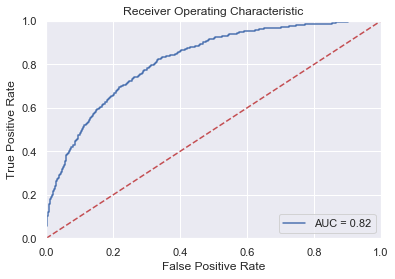

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


C:\Users\Redhawk\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy: 98.11
Accuracy CV 10-Fold: 78.24
Running Time: 0:00:00.601961
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      3614
           1       0.63      0.45      0.53      1316

    accuracy                           0.78      4930
   macro avg       0.72      0.68      0.69      4930
weighted avg       0.77      0.78      0.77      4930

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1560
           1       0.61      0.42      0.50       553

    accuracy                           0.78      2113
   macro avg       0.71      0.66      0.68      2113
weighted avg       0.76      0.78      0.76      2113



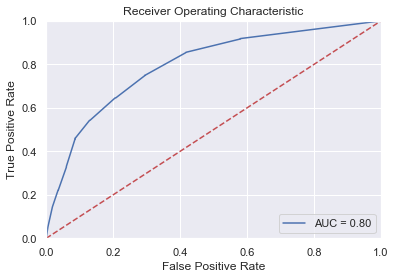

GaussianNB(priors=None, var_smoothing=1e-09)
Accuracy: 74.93
Accuracy CV 10-Fold: 74.87
Running Time: 0:00:00.230579
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      3614
           1       0.52      0.80      0.63      1316

    accuracy                           0.75      4930
   macro avg       0.71      0.76      0.72      4930
weighted avg       0.80      0.75      0.76      4930

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1560
           1       0.50      0.78      0.61       553

    accuracy                           0.74      2113
   macro avg       0.70      0.75      0.71      2113
weighted avg       0.80      0.74      0.75      2113



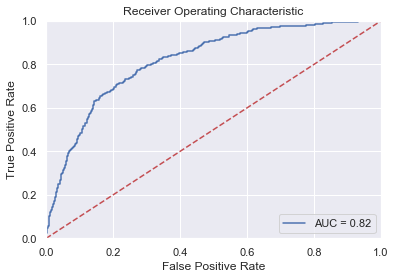

In [75]:
logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,
                              random_state=0)
distributions = dict(C=uniform(loc=0, scale=4),
                     penalty=['l2', 'l1'])
models = []
models.append(LogisticRegression())
models.append( RandomizedSearchCV(logistic, distributions, random_state=0))
models.append(KNeighborsClassifier())
models.append(DecisionTreeClassifier())
models.append(XGBClassifier())
models.append(RandomForestClassifier())
models.append(GaussianNB())

for alg in models:
    start_time = time.time() #test_pred_dummy,
    print(alg)
    train_pred_dummy, test_pred_dummy, acc_dummy, acc_cv_dummy, probs_dummy = fit_ml_algo(alg, X_pr_train, y_train, X_pr_test, y_test, cv=10)
    dummy_time = (time.time() - start_time)

    prob = alg.predict_proba(X_pr_test)
    pred = prob[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, pred)
    roc_auc = metrics.auc(fpr, tpr)


    print("Accuracy: %s" % acc_dummy)
    print("Accuracy CV 10-Fold: %s" % acc_cv_dummy)
    print("Running Time: %s" % datetime.timedelta(seconds=dummy_time))

    print (metrics.classification_report(y_train, train_pred_dummy))

    print (metrics.classification_report(y_test, test_pred_dummy))

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    

    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [76]:
DTree = DecisionTreeClassifier()
DTree.fit(X_proc, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [77]:
def feature_importance(model, data):
    fea_imp = pd.DataFrame({'Fscore': model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['Fscore', 'col'], ascending=[True, True]).iloc[-15:]
    _ = fea_imp.plot(kind='barh', x='col', y='Fscore', figsize=(15, 15)) 
    return fea_imp

,Fscore,col
6,0.013645,MultipleLines
10,0.013715,TechSupport
1,0.014981,SeniorCitizen
24,0.016028,PaymentMethod_Electronic check
8,0.016548,OnlineBackup
7,0.018380,OnlineSecurity
13,0.018477,PaperlessBilling
3,0.019060,Dependents
2,0.020289,Partner
0,0.032217,gender


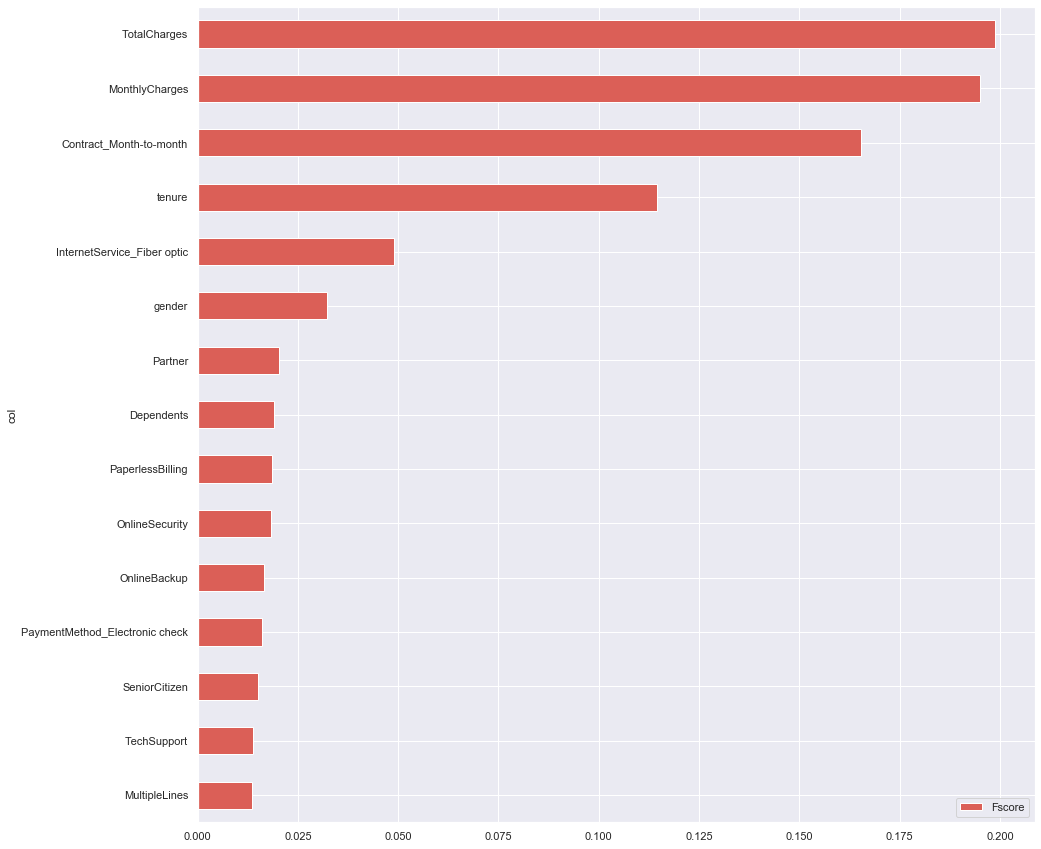

In [78]:
feature_importance(DTree, df3.drop("Churn", axis=1))

In [79]:
importances = DTree.feature_importances_
importances*100

array([ 3.22167115,  1.49814447,  2.02889181,  1.90597184, 11.46317933,
        0.34554709,  1.36452312,  1.83796596,  1.65478587,  1.34834466,
        1.37154899,  0.95700446,  1.23658722,  1.84769405, 19.50567326,
       19.87023106,  0.75246276,  4.89995539,  0.04890787, 16.53022642,
        0.14566619,  0.29848218,  1.26795593,  0.87972143,  1.60279594,
        1.33324735,  0.04366774,  0.05691411,  0.41204611,  0.15245799,
        0.11772824])

In [80]:
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Gradient Boosting Trees',XGBClassifier()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Naive Bayes', GaussianNB()))

In [81]:
#evaluation
num_folds = 10
seed = 7
scoring = 'accuracy'
results = []
names = []
model_comp=pd.DataFrame(columns=['Model','Score'])

for name, model in models:
    
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_pr_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    model_comp=model_comp.append([{'Model':name, 'Score':cv_results.mean()*100}],ignore_index=True)
    
model_comp

C:\Users\Redhawk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Redhawk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Redhawk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Redhawk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Redhawk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

,Model,Score
0,Logistic Regression,80.243408
1,Gradient Boosting Trees,77.849899
2,Random Forest,78.215010
3,kNN,76.896552
4,Decision Tree,72.657201
5,Naive Bayes,74.827586


C:\Users\Redhawk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Redhawk\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


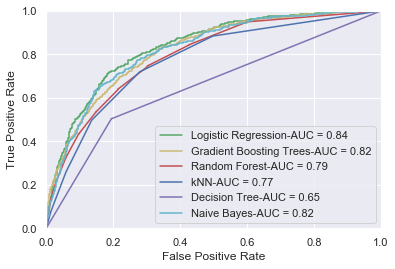

In [82]:
model1 = LogisticRegression()
model2 = XGBClassifier()
model3 = RandomForestClassifier()
model4 = KNeighborsClassifier()
model5 = DecisionTreeClassifier()
model6 = GaussianNB()

model1.fit(X_pr_train, y_train)
model2.fit(X_pr_train, y_train)
model3.fit(X_pr_train, y_train)
model4.fit(X_pr_train, y_train)
model5.fit(X_pr_train, y_train)
model6.fit(X_pr_train, y_train)


#pred1 = model1.predict(X_test)
probs1 = model1.predict_proba(X_pr_test)
probs2 = model2.predict_proba(X_pr_test)
probs3 = model3.predict_proba(X_pr_test)
probs4 = model4.predict_proba(X_pr_test)
probs5 = model5.predict_proba(X_pr_test)
probs6 = model6.predict_proba(X_pr_test)

preds1 = probs1[:,1]
preds2 = probs2[:,1]
preds3 = probs3[:,1]
preds4 = probs4[:,1]
preds5 = probs5[:,1]
preds6 = probs6[:,1]



fpr1, tpr1, threshold1 = metrics.roc_curve(y_test, preds1)
fpr2, tpr2, threshold2 = metrics.roc_curve(y_test, preds2)
fpr3, tpr3, threshold3 = metrics.roc_curve(y_test, preds3)
fpr4, tpr4, threshold4 = metrics.roc_curve(y_test, preds4)
fpr5, tpr5, threshold5 = metrics.roc_curve(y_test, preds5)
fpr6, tpr6, threshold6 = metrics.roc_curve(y_test, preds6)
roc_auc1 = metrics.auc(fpr1, tpr1)
roc_auc2 = metrics.auc(fpr2, tpr2)
roc_auc3 = metrics.auc(fpr3, tpr3)
roc_auc4 = metrics.auc(fpr4, tpr4)
roc_auc5 = metrics.auc(fpr5, tpr5)
roc_auc6 = metrics.auc(fpr6, tpr6)


plt.plot(fpr1, tpr1, 'g', label = 'Logistic Regression-AUC = %0.2f' % roc_auc1)
plt.plot(fpr2, tpr2, 'y', label = 'Gradient Boosting Trees-AUC = %0.2f' % roc_auc2)
plt.plot(fpr3, tpr3, 'r', label = 'Random Forest-AUC = %0.2f' % roc_auc3)
plt.plot(fpr4, tpr4, 'b', label = 'kNN-AUC = %0.2f' % roc_auc4)
plt.plot(fpr5, tpr5, 'm', label = 'Decision Tree-AUC = %0.2f' % roc_auc5)
plt.plot(fpr6, tpr6, 'c', label = 'Naive Bayes-AUC = %0.2f' % roc_auc6)

plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Interpretation

Highest AUC score is observed for Logistic Regression and XGboost
Lowest AUC score is observed for Decession Tree

In [83]:
pred1 = model1.predict(X_pr_test)
pred2 = model2.predict(X_pr_test)
pred3 = model3.predict(X_pr_test)
pred4 = model4.predict(X_pr_test)
pred5 = model5.predict(X_pr_test)
pred6 = model6.predict(X_pr_test)

In [85]:
print ("Logistic accuracy score : ",accuracy_score(y_test, pred1))
print ("Gradient Boosting Trees accuracy score : ",accuracy_score(y_test, pred2))
print ("Random Forest accuracy score : ",accuracy_score(y_test, pred3))
print ("kNN accuracy score : ",accuracy_score(y_test, pred4))
print ("Decision Tree accuracy score : ",accuracy_score(y_test, pred5))
print ("Naive Bayes accuracy score : ",accuracy_score(y_test, pred6))

Logistic accuracy score :  0.7998106956933271
Gradient Boosting Trees accuracy score :  0.7865593942262187
Random Forest accuracy score :  0.7799337434926644
kNN accuracy score :  0.7681022243256034
Decision Tree accuracy score :  0.7264552768575485
Naive Bayes accuracy score :  0.7397065783246569


Hence it can be concluded that Logistic regression model is the most accurate one with ANN

# The End!